In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("/Users/shahnawazaadil/Downloads/fcc-forum-pageviews.csv",index_col="date" , parse_dates=True)

In [3]:
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [4]:
df=df[df['value'].between(df['value'].quantile(0.025),df['value'].quantile(0.975))]

In [5]:
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


In [6]:
months= ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Page Views')]

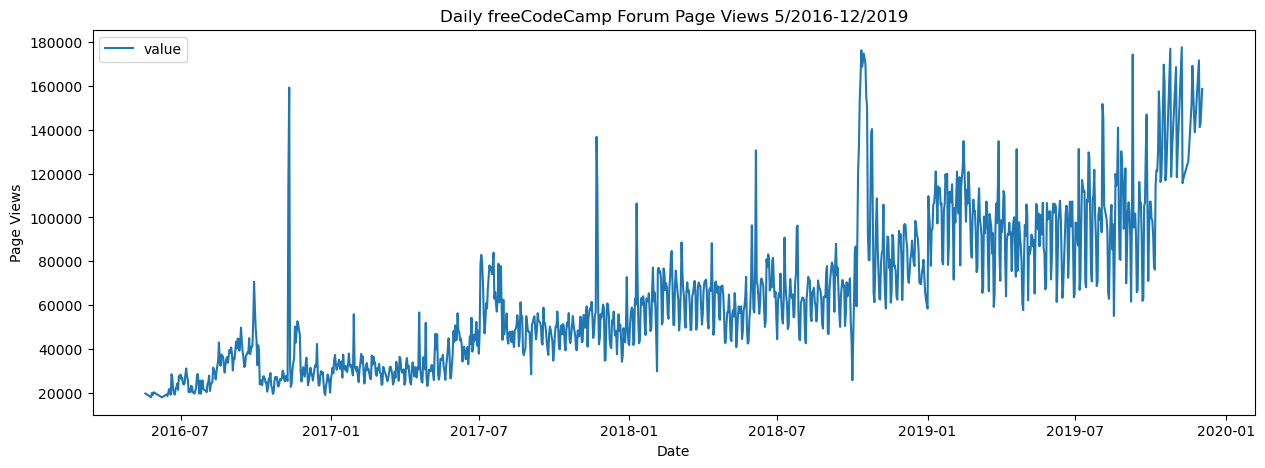

In [16]:
ax = plt.subplots(figsize=(15,5))
ax = sns.lineplot(data = df, legend="brief")
ax.set(title='Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
ax.set(xlabel = "Date",ylabel = "Page Views")

[Text(0.5, 0, 'years'), Text(0, 0.5, 'Page Views')]

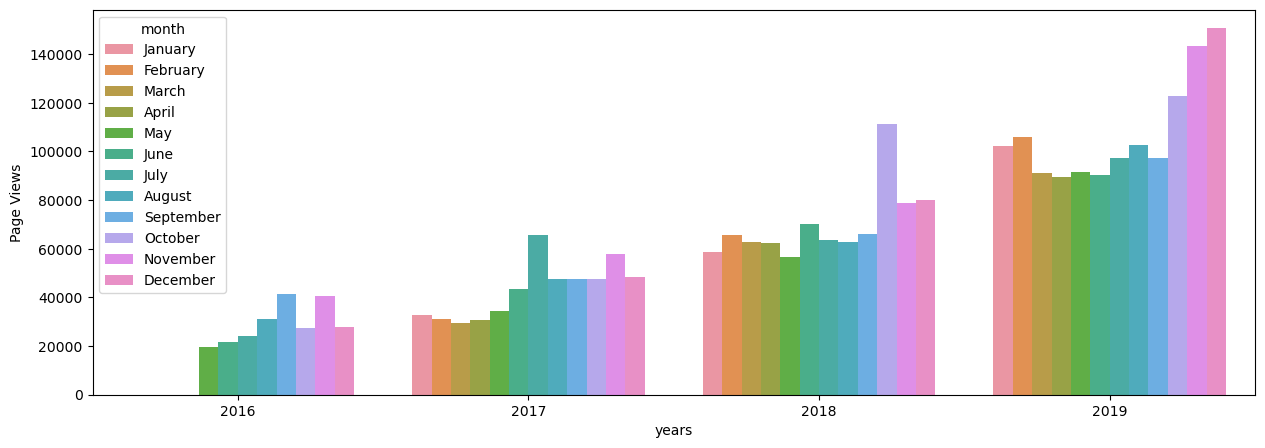

In [29]:
df_bar=df.copy()
df_bar['year']=df.index.year.values
df_bar['month']=df.index.month_name()
ax = plt.subplots(figsize=(15,5))
ax= sns.barplot(x='year',y='value',hue='month',data=df_bar,hue_order=months,errorbar=None)
ax.set(xlabel='years',ylabel='Page Views')

In [32]:
df_box=df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]
df_box['monthnumber'] = df.index.month
df_box = df_box.sort_values('monthnumber')

[Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Page Views'),
 Text(0.5, 1.0, 'Year-wise Box Plot (Trend)')]

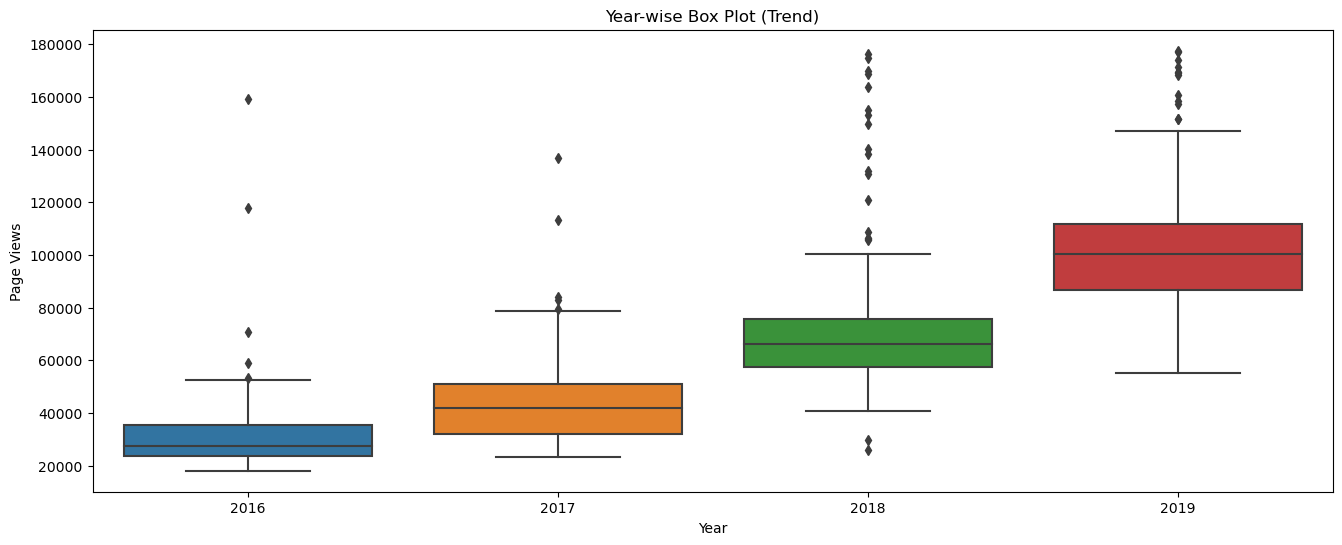

In [43]:
ax = plt.subplots(figsize=(16,6))
ax=sns.boxplot(y = "value", x = "year", data = df_box)
ax.set(xlabel="Year", ylabel="Page Views", title="Year-wise Box Plot (Trend)")

[Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Page Views'),
 Text(0.5, 1.0, 'Month-wise Box Plot (Seasonality)')]

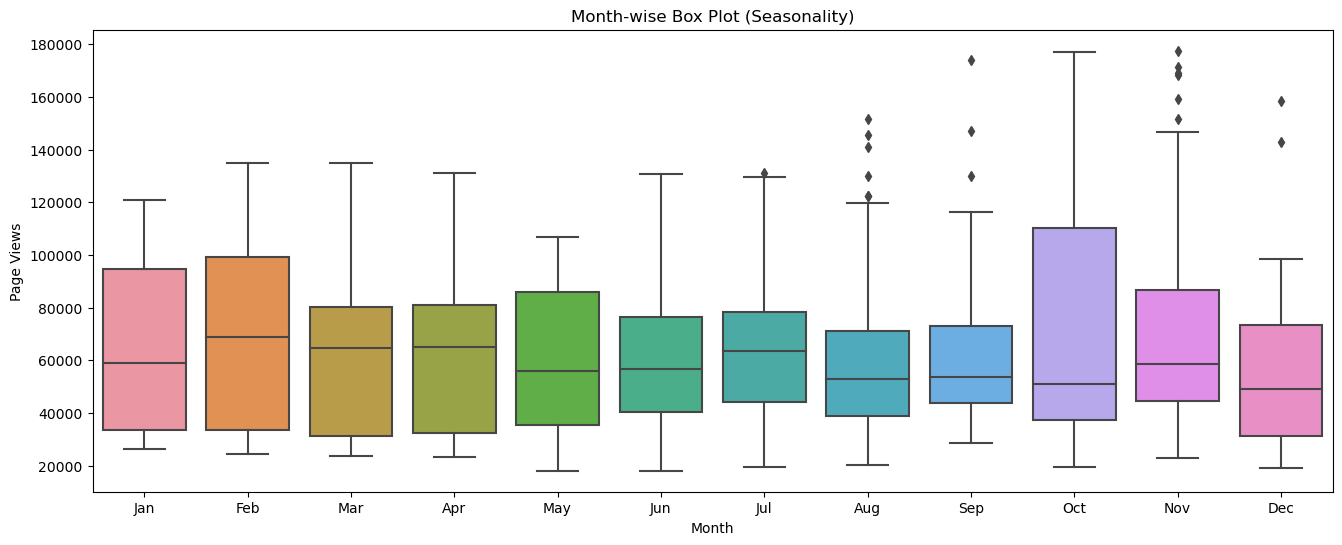

In [44]:
ax = plt.subplots(figsize=(16,6))
ax=sns.boxplot(y = "value", x = "month", data = df_box)
ax.set(xlabel="Month", ylabel="Page Views", title="Month-wise Box Plot (Seasonality)")